
# Quickstart


## Creating an isotherm

First, we need to import the package.

In [1]:
import pygaps

The backbone of the framework is the PointIsotherm class. This class stores the isotherm
data alongside isotherm properties such as the material, adsorbate and temperature, as well
as providing easy interaction with the framework calculations. 
There are several ways to create a PointIsotherm object:

- directly from arrays
- from a pandas.DataFrame
- parsing json, csv files, or excel files
- loading from an sqlite database

See the [isotherm creation](../manual/isotherm.rst) part of the 
documentation for a more in-depth explanation. 
For the simplest method, the data can be passed in as arrays of *pressure* and *loading*. 
There are four other required parameters: 
the material name, the material batch or ID, the adsorbate
used and the temperature (in K) at which the data was recorded.

In [2]:
isotherm = pygaps.PointIsotherm(
    pressure=[0.1, 0.2, 0.3, 0.4, 0.5, 0.4, 0.35, 0.25, 0.15, 0.05],
    loading=[0.1, 0.2, 0.3, 0.4, 0.5, 0.45, 0.4, 0.3, 0.15, 0.05],
    material= 'Carbon X1',
    adsorbate = 'N2',
    temperature = 77,
)

To see a summary of the isotherm, use the `print` function:

In [3]:
print(isotherm)

Material: Carbon X1
Adsorbate: nitrogen
Temperature: 77.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 



Unless specified, the loading is read in *mmol/g* and the
pressure is read in *bar*, although these settings can be changed.
Read more about it in the [units section](../manual/units.rst) of the manual.
The isotherm can also have other properties which are passed in at creation. 

Alternatively, the data can be passed in the form of a pandas.DataFrame.
This allows for other complementary data, such as isosteric enthalpy, XRD peak intensity, or other
simultaneous measurements corresponding to each point to be saved.

The DataFrame should have at least two columns: the pressures
at which each point was recorded, and the loadings for each point.
The `loading_key` and `pressure_key` parameters specify which column in the DataFrame
contain the loading and pressure, respectively. The `other_keys` parameter
should be a list of other columns to be saved.

In [4]:
import pandas

data = pandas.DataFrame({
    'pressure': [0.1, 0.2, 0.3, 0.4, 0.5, 0.45, 0.35, 0.25, 0.15, 0.05],
    'loading': [0.1, 0.2, 0.3, 0.4, 0.5, 0.5, 0.4, 0.3, 0.15, 0.05],
    'isosteric_enthalpy [kJ/mol]': [15, 14, 13.5, 13, 12, 11, 10, 10, 10, 10],
    'unimportant_data': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]  # This will not be saved!
})

isotherm = pygaps.PointIsotherm(
    isotherm_data=data,
    pressure_key='pressure',
    loading_key='loading',
    other_keys=['isosteric_enthalpy [kJ/mol]'],
    
    material= 'Carbon X1',
    adsorbate = 'N2',
    temperature = 77,
    
    pressure_unit='bar',
    pressure_mode='absolute',
    loading_unit='mmol',
    loading_basis='molar',
    adsorbent_unit='g',
    adsorbent_basis='mass',
    
    material_batch = 'Batch 1',
    iso_type='characterisation'
)

A summary and a plot can be generated by using the `print_info` function.

Material: Carbon X1
Adsorbate: nitrogen
Temperature: 77.0K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	material_batch: Batch 1
	iso_type: characterisation



[<AxesSubplot:title={'center':'Carbon X1'}, xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>,
 <AxesSubplot:label='6b32db12-b99d-4b88-8e47-d7158817553c', ylabel='isosteric_enthalpy [kJ/mol]'>]

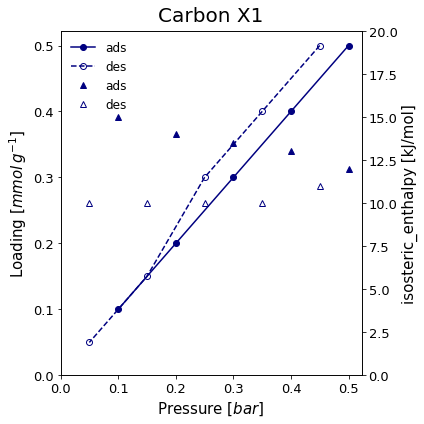

In [5]:
isotherm.print_info(y2_range=[0, 20])

pyGAPS also comes with a variety of parsers. Here we can use the JSON parser to get an isotherm previously saved on disk. For more info on parsing to and from various formats see the [manual](../manual/parsing.rst) and the associated [examples](../examples/parsing.ipynb).

In [6]:
isotherm = pygaps.isotherm_from_json(r'data/carbon_x1_n2.json')

To see just a plot of the isotherm, use the `plot` function:

<AxesSubplot:title={'center':'Takeda 5A'}, xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

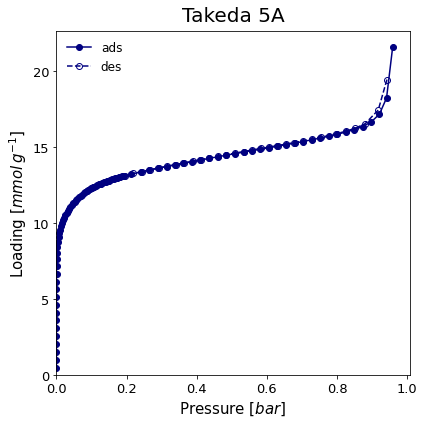

In [7]:
isotherm.plot()

Now that the PointIsotherm is created, we are ready to do some analysis.

---

## Isotherm analysis

The framework has several isotherm analysis tools which are commonly used to characterise
porous materials such as:

- BET surface area
- the t-plot method / alpha s method
- mesoporous PSD (pore size distribution) calculations
- microporous PSD calculations
- DFT kernel fitting PSD methods
- isosteric enthalpy of adsorption calculation
- etc.

All methods work directly with generated Isotherms. For example, to perform a tplot analysis and get the results in a dictionary use:

In [8]:
result_dict = pygaps.t_plot(isotherm)

import pprint
pprint.pprint(result_dict)

{'results': [{'adsorbed_volume': 0.4493471225837101,
              'area': 99.54915759758687,
              'corr_coef': 0.9996658295304233,
              'intercept': 0.012929909242021878,
              'section': [84, 85, 86, 87, 88, 89, 90],
              'slope': 0.0028645150000192604}],
 't_curve': array([0.14381104, 0.14800322, 0.1525095 , 0.15712503, 0.1617626 ,
       0.16612841, 0.17033488, 0.17458578, 0.17879119, 0.18306956,
       0.18764848, 0.19283516, 0.19881473, 0.2058225 , 0.21395749,
       0.2228623 , 0.23213447, 0.2411563 , 0.24949659, 0.25634201,
       0.2635719 , 0.27002947, 0.27633547, 0.28229453, 0.28784398,
       0.29315681, 0.29819119, 0.30301872, 0.30762151, 0.31210773,
       0.31641915, 0.32068381, 0.32481658, 0.32886821, 0.33277497,
       0.33761078, 0.34138501, 0.34505614, 0.34870159, 0.35228919,
       0.35587619, 0.35917214, 0.36264598, 0.36618179, 0.36956969,
       0.37295932, 0.37630582, 0.37957513, 0.38277985, 0.38608229,
       0.3892784 , 0.3924

If in an interactive environment, such as iPython or Jupyter, it is useful to see the
details of the calculation directly. To do this, increase the verbosity of the method to display extra information, including graphs:

BET surface area: a = 1.11e+03 m2/g
Minimum pressure point is 0.010 and maximum is 0.093
The slope of the BET fit: s = 8.76e+01
The intercept of the BET fit: i = 2.37e-01
The BET constant is: C = 369.9
Amount for a monolayer: n = 1.14e-02 mol/g


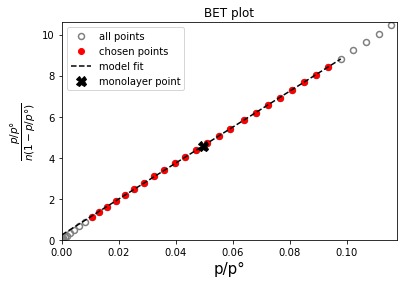

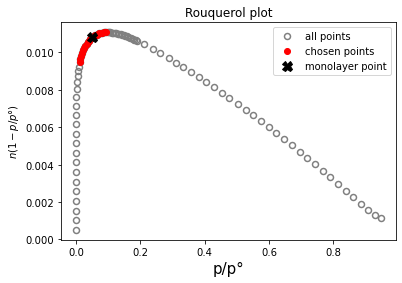

In [9]:
result_dict = pygaps.area_BET(isotherm, verbose=True)

Depending on the method, different parameters can be passed to tweak the way the
calculations are performed. For example, if a mesoporous size distribution is
desired using the Dollimore-Heal method on the desorption branch of the isotherm,
assuming the pores are cylindrical and that adsorbate thickness can
be described by a Halsey-type thickness curve, the code will look like:

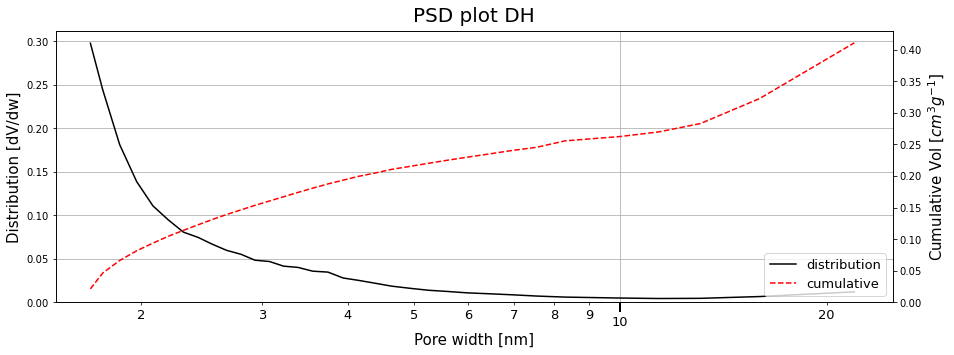

In [10]:
result_dict = pygaps.psd_mesoporous(
    isotherm,
    psd_model='DH',
    branch='des',
    pore_geometry='cylinder',
    thickness_model='Halsey',
    verbose=True,
)

For more information on how to use each method, check the [manual](../manual/characterisation.rst) and the associated [examples](../examples/characterisation.rst).

---

## Isotherm modelling

The framework comes with functionality to fit point isotherm data with common
isotherm models such as Henry, Langmuir, Temkin, Virial etc.

The modelling is done through the ModelIsotherm class. The class is similar to the
PointIsotherm class, and shares the same ability to store parameters. However, instead of
data, it stores model coefficients for the model it's describing.

To create a ModelIsotherm, the same parameters dictionary / pandas DataFrame procedure can
be used. But, assuming we've already created a PointIsotherm object, we can use it to instantiate
the ModelIsotherm instead. To do this we use the class method:

Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.846


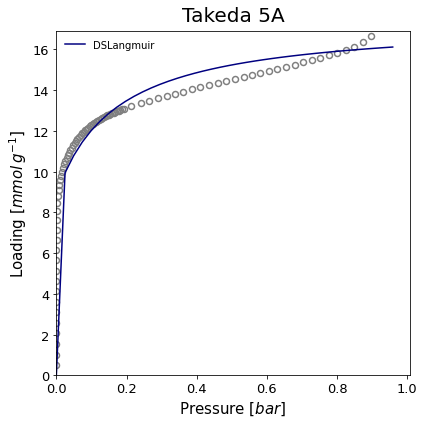

In [11]:
model_iso = pygaps.ModelIsotherm.from_pointisotherm(isotherm, model='DSLangmuir', verbose=True)

A minimisation procedure will then attempt to fit the model's parameters to the isotherm points.
If successful, the ModelIsotherm is returned.

In the user wants to screen several models at once, the class method can also be passed a
parameter which allows the ModelIsotherm to select the best fitting model. Below, we 
will attempt to fit several simple available models, and the one with the best RMSE will be
returned. Depending on the models requested, this method may take significant processing time.

Attempting to model using Henry.
Model Henry success, RMSE is 7.419
Attempting to model using Langmuir.
Model Langmuir success, RMSE is 2.120
Attempting to model using DSLangmuir.
Model DSLangmuir success, RMSE is 0.846
Attempting to model using DR.
Model DR success, RMSE is 1.315
Attempting to model using Freundlich.
Model Freundlich success, RMSE is 0.738
Attempting to model using Quadratic.
Model Quadratic success, RMSE is 0.848
Attempting to model using BET.
Model BET success, RMSE is 1.086
Attempting to model using TemkinApprox.
Model TemkinApprox success, RMSE is 2.046
Attempting to model using Toth.
Model Toth success, RMSE is 0.754
Attempting to model using JensenSeaton.
Model JensenSeaton success, RMSE is 0.533
Best model fit is JensenSeaton.


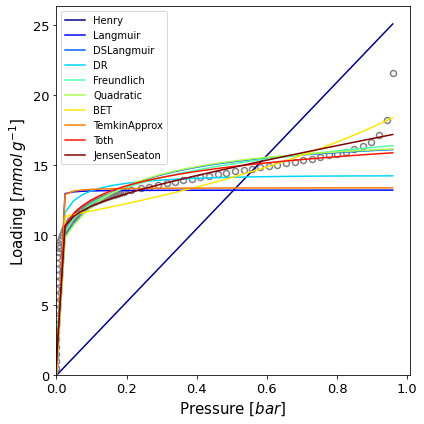

In [12]:
model_iso = pygaps.ModelIsotherm.from_pointisotherm(isotherm, model='guessall', verbose=True)

More advanced settings can also be specified, such as the optimisation model to be used in the
optimisation routine or the initial parameter guess. For in-depth examples and discussion check the [manual](../manual/modelling.rst) and the associated [examples](../examples/modelling.rst).

To print the model parameters use the same print method as before.

Material: Takeda 5A
Adsorbate: nitrogen
Temperature: 77.355K
Units: 
	Uptake in: mmol/g
	Pressure in: bar
Other properties: 
	branch: ads
	plot_fit: False
	iso_type: Isotherme
	lab: MADIREL
	machine: Triflex
	material_batch: Test
	t_act: 200.0
	user: PI
JensenSeaton isotherm model.
RMSE = 0.5325
Model parameters:
	K = 544366717.84
	a = 16.73
	b = 0.34
	c = 0.18
Model applicable range:
	Pressure range: 0.00 - 0.96
	Loading range: 0.51 - 21.59



<AxesSubplot:title={'center':'Takeda 5A'}, xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

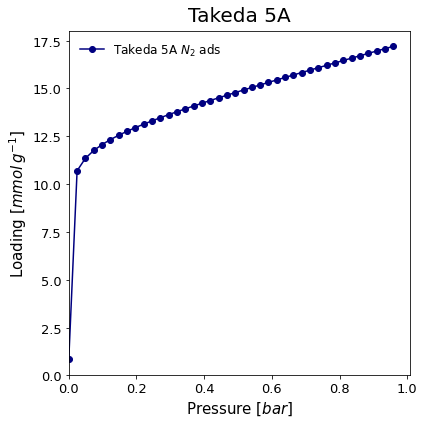

In [13]:
 # Prints isotherm parameters and model info
model_iso.print_info()

We can calculate the loading at any pressure using the internal model by using the ``loading_at`` function.

In [14]:
# Returns the loading at 1 bar calculated with the model
model_iso.loading_at(1.0)

17.40231905058651

In [15]:
# Returns the loading in the range 0-1 bar calculated with the model
pressure = [0.1,0.5,1]
model_iso.loading_at(pressure)

array([12.08223174, 14.82544387, 17.40231905])

## Plotting

pyGAPS makes graphing both PointIsotherm and ModelIsotherm objects easy to facilitate
visual observations, inclusion in publications and consistency. Plotting an isotherm is
as simple as:

<AxesSubplot:xlabel='Pressure [$bar$]', ylabel='Loading [$mmol\\/g^{-1}$]'>

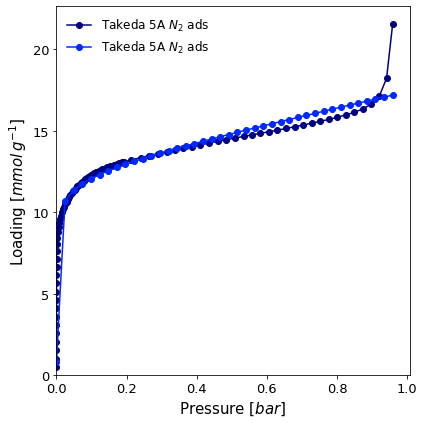

In [16]:
pygaps.plot_iso([isotherm, model_iso], branch='ads')

Many settings can be specified to change the look and feel of the graphs. More 
explanations can be found in the [manual](../manual/plotting.rst) and in 
the [examples](../examples/plotting.ipynb) section.